# Metric Analysis

In [40]:
import os
import pandas as pd
current_path = os.getcwd()
current_path

'/workspaces/Bg_pre2'

In [41]:
direct_mix_metrics = pd.read_csv(os.path.join(current_path, 'metrics', 'direct_mix_metrics.csv'))
self_learning_metrics = pd.read_csv(os.path.join(current_path, 'metrics', 'self_learning_metrics.csv'))
stacking_metrics = pd.read_csv(os.path.join(current_path, 'metrics', 'stacking_metrics.csv'))

In [42]:
mix_metrics = pd.concat([direct_mix_metrics, self_learning_metrics, stacking_metrics], axis=0, ignore_index=True)

In [43]:
mix_metrics = mix_metrics.replace({'Train_set': {'meta': 'mix'}})
mix_metrics

,Model,Error_Type,Train_set,Test_set,R²,RMSE,MAE
0,Direct Mix XGBoost,Train,mix,mix,0.780055,0.397760,0.192057
1,Direct Mix XGBoost,Test,mix,dft,0.683449,0.481582,0.342802
2,Direct Mix XGBoost,Test,mix,exp,0.145262,0.732775,0.580780
3,Direct Mix XGBoost,Test,mix,mix,0.460425,0.611612,0.457145
4,Self Learning XGBoost,Train,mix,mix,0.979795,0.108891,0.081410
5,Self Learning XGBoost,Test,mix,dft,0.235136,0.748583,0.535187
6,Self Learning XGBoost,Test,mix,exp,0.739510,0.404529,0.289146
7,Self Learning XGBoost,Test,mix,mix,0.504964,0.585825,0.400871
8,Stacking XGBoost,Train,mix,meta,0.989640,0.081744,0.046543
9,Stacking XGBoost,Test,mix,dft,0.180827,0.774704,0.620548


In [44]:
mix_metrics = mix_metrics[mix_metrics['Error_Type'] != 'Train']
mix_metrics

,Model,Error_Type,Train_set,Test_set,R²,RMSE,MAE
1,Direct Mix XGBoost,Test,mix,dft,0.683449,0.481582,0.342802
2,Direct Mix XGBoost,Test,mix,exp,0.145262,0.732775,0.580780
3,Direct Mix XGBoost,Test,mix,mix,0.460425,0.611612,0.457145
5,Self Learning XGBoost,Test,mix,dft,0.235136,0.748583,0.535187
6,Self Learning XGBoost,Test,mix,exp,0.739510,0.404529,0.289146
7,Self Learning XGBoost,Test,mix,mix,0.504964,0.585825,0.400871
9,Stacking XGBoost,Test,mix,dft,0.180827,0.774704,0.620548
10,Stacking XGBoost,Test,mix,exp,0.698536,0.435183,0.312093
11,Stacking XGBoost,Test,mix,mix,0.454646,0.614878,0.455206


In [45]:
mix_metrics.drop(columns=['Error_Type'], inplace=True)

/tmp/ipykernel_118204/1156461529.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mix_metrics.drop(columns=['Error_Type'], inplace=True)


In [46]:
mix_metrics

,Model,Train_set,Test_set,R²,RMSE,MAE
1,Direct Mix XGBoost,mix,dft,0.683449,0.481582,0.342802
2,Direct Mix XGBoost,mix,exp,0.145262,0.732775,0.580780
3,Direct Mix XGBoost,mix,mix,0.460425,0.611612,0.457145
5,Self Learning XGBoost,mix,dft,0.235136,0.748583,0.535187
6,Self Learning XGBoost,mix,exp,0.739510,0.404529,0.289146
7,Self Learning XGBoost,mix,mix,0.504964,0.585825,0.400871
9,Stacking XGBoost,mix,dft,0.180827,0.774704,0.620548
10,Stacking XGBoost,mix,exp,0.698536,0.435183,0.312093
11,Stacking XGBoost,mix,mix,0.454646,0.614878,0.455206


In [47]:
exp_dft_metrics = pd.read_csv(os.path.join(current_path, 'metrics', 'single_model_metrics.csv'))
exp_dft_metrics = exp_dft_metrics[exp_dft_metrics['Model'] == 'Single XGBoost']

In [48]:
exp_dft_metrics.drop(columns=['MAPE'], inplace=True)
exp_dft_metrics.reset_index(drop=True, inplace=True)
exp_dft_metrics

,Model,Train_set,Test_set,R²,RMSE,MAE
0,Single XGBoost,dft,dft,0.685857,0.479747,0.343075
1,Single XGBoost,dft,exp,0.187836,0.714292,0.569127
2,Single XGBoost,dft,mix,0.476027,0.602704,0.453130
3,Single XGBoost,exp,exp,0.708634,0.427832,0.307740
4,Single XGBoost,exp,dft,-0.045238,0.875096,0.686794
5,Single XGBoost,exp,mix,0.347392,0.672630,0.484425


In [49]:
exp_dft_metrics.loc[:3, 'Model'] = 'Single DFT XGBoost'
exp_dft_metrics.loc[3:, 'Model'] = 'Single EXP XGBoost'
exp_dft_metrics

,Model,Train_set,Test_set,R²,RMSE,MAE
0,Single DFT XGBoost,dft,dft,0.685857,0.479747,0.343075
1,Single DFT XGBoost,dft,exp,0.187836,0.714292,0.569127
2,Single DFT XGBoost,dft,mix,0.476027,0.602704,0.453130
3,Single EXP XGBoost,exp,exp,0.708634,0.427832,0.307740
4,Single EXP XGBoost,exp,dft,-0.045238,0.875096,0.686794
5,Single EXP XGBoost,exp,mix,0.347392,0.672630,0.484425


In [50]:
metrics = pd.concat([exp_dft_metrics, mix_metrics], axis=0, ignore_index=True)
metrics

,Model,Train_set,Test_set,R²,RMSE,MAE
0,Single DFT XGBoost,dft,dft,0.685857,0.479747,0.343075
1,Single DFT XGBoost,dft,exp,0.187836,0.714292,0.569127
2,Single DFT XGBoost,dft,mix,0.476027,0.602704,0.453130
3,Single EXP XGBoost,exp,exp,0.708634,0.427832,0.307740
4,Single EXP XGBoost,exp,dft,-0.045238,0.875096,0.686794
5,Single EXP XGBoost,exp,mix,0.347392,0.672630,0.484425
6,Direct Mix XGBoost,mix,dft,0.683449,0.481582,0.342802
7,Direct Mix XGBoost,mix,exp,0.145262,0.732775,0.580780
8,Direct Mix XGBoost,mix,mix,0.460425,0.611612,0.457145
9,Self Learning XGBoost,mix,dft,0.235136,0.748583,0.535187


In [51]:
# calulate the mean of the metrics
metrics.groupby('Model')['RMSE'].mean()


Model
Direct Mix XGBoost       0.608656
Self Learning XGBoost    0.579646
Single DFT XGBoost       0.598914
Single EXP XGBoost       0.658519
Stacking XGBoost         0.608255
Name: RMSE, dtype: float64

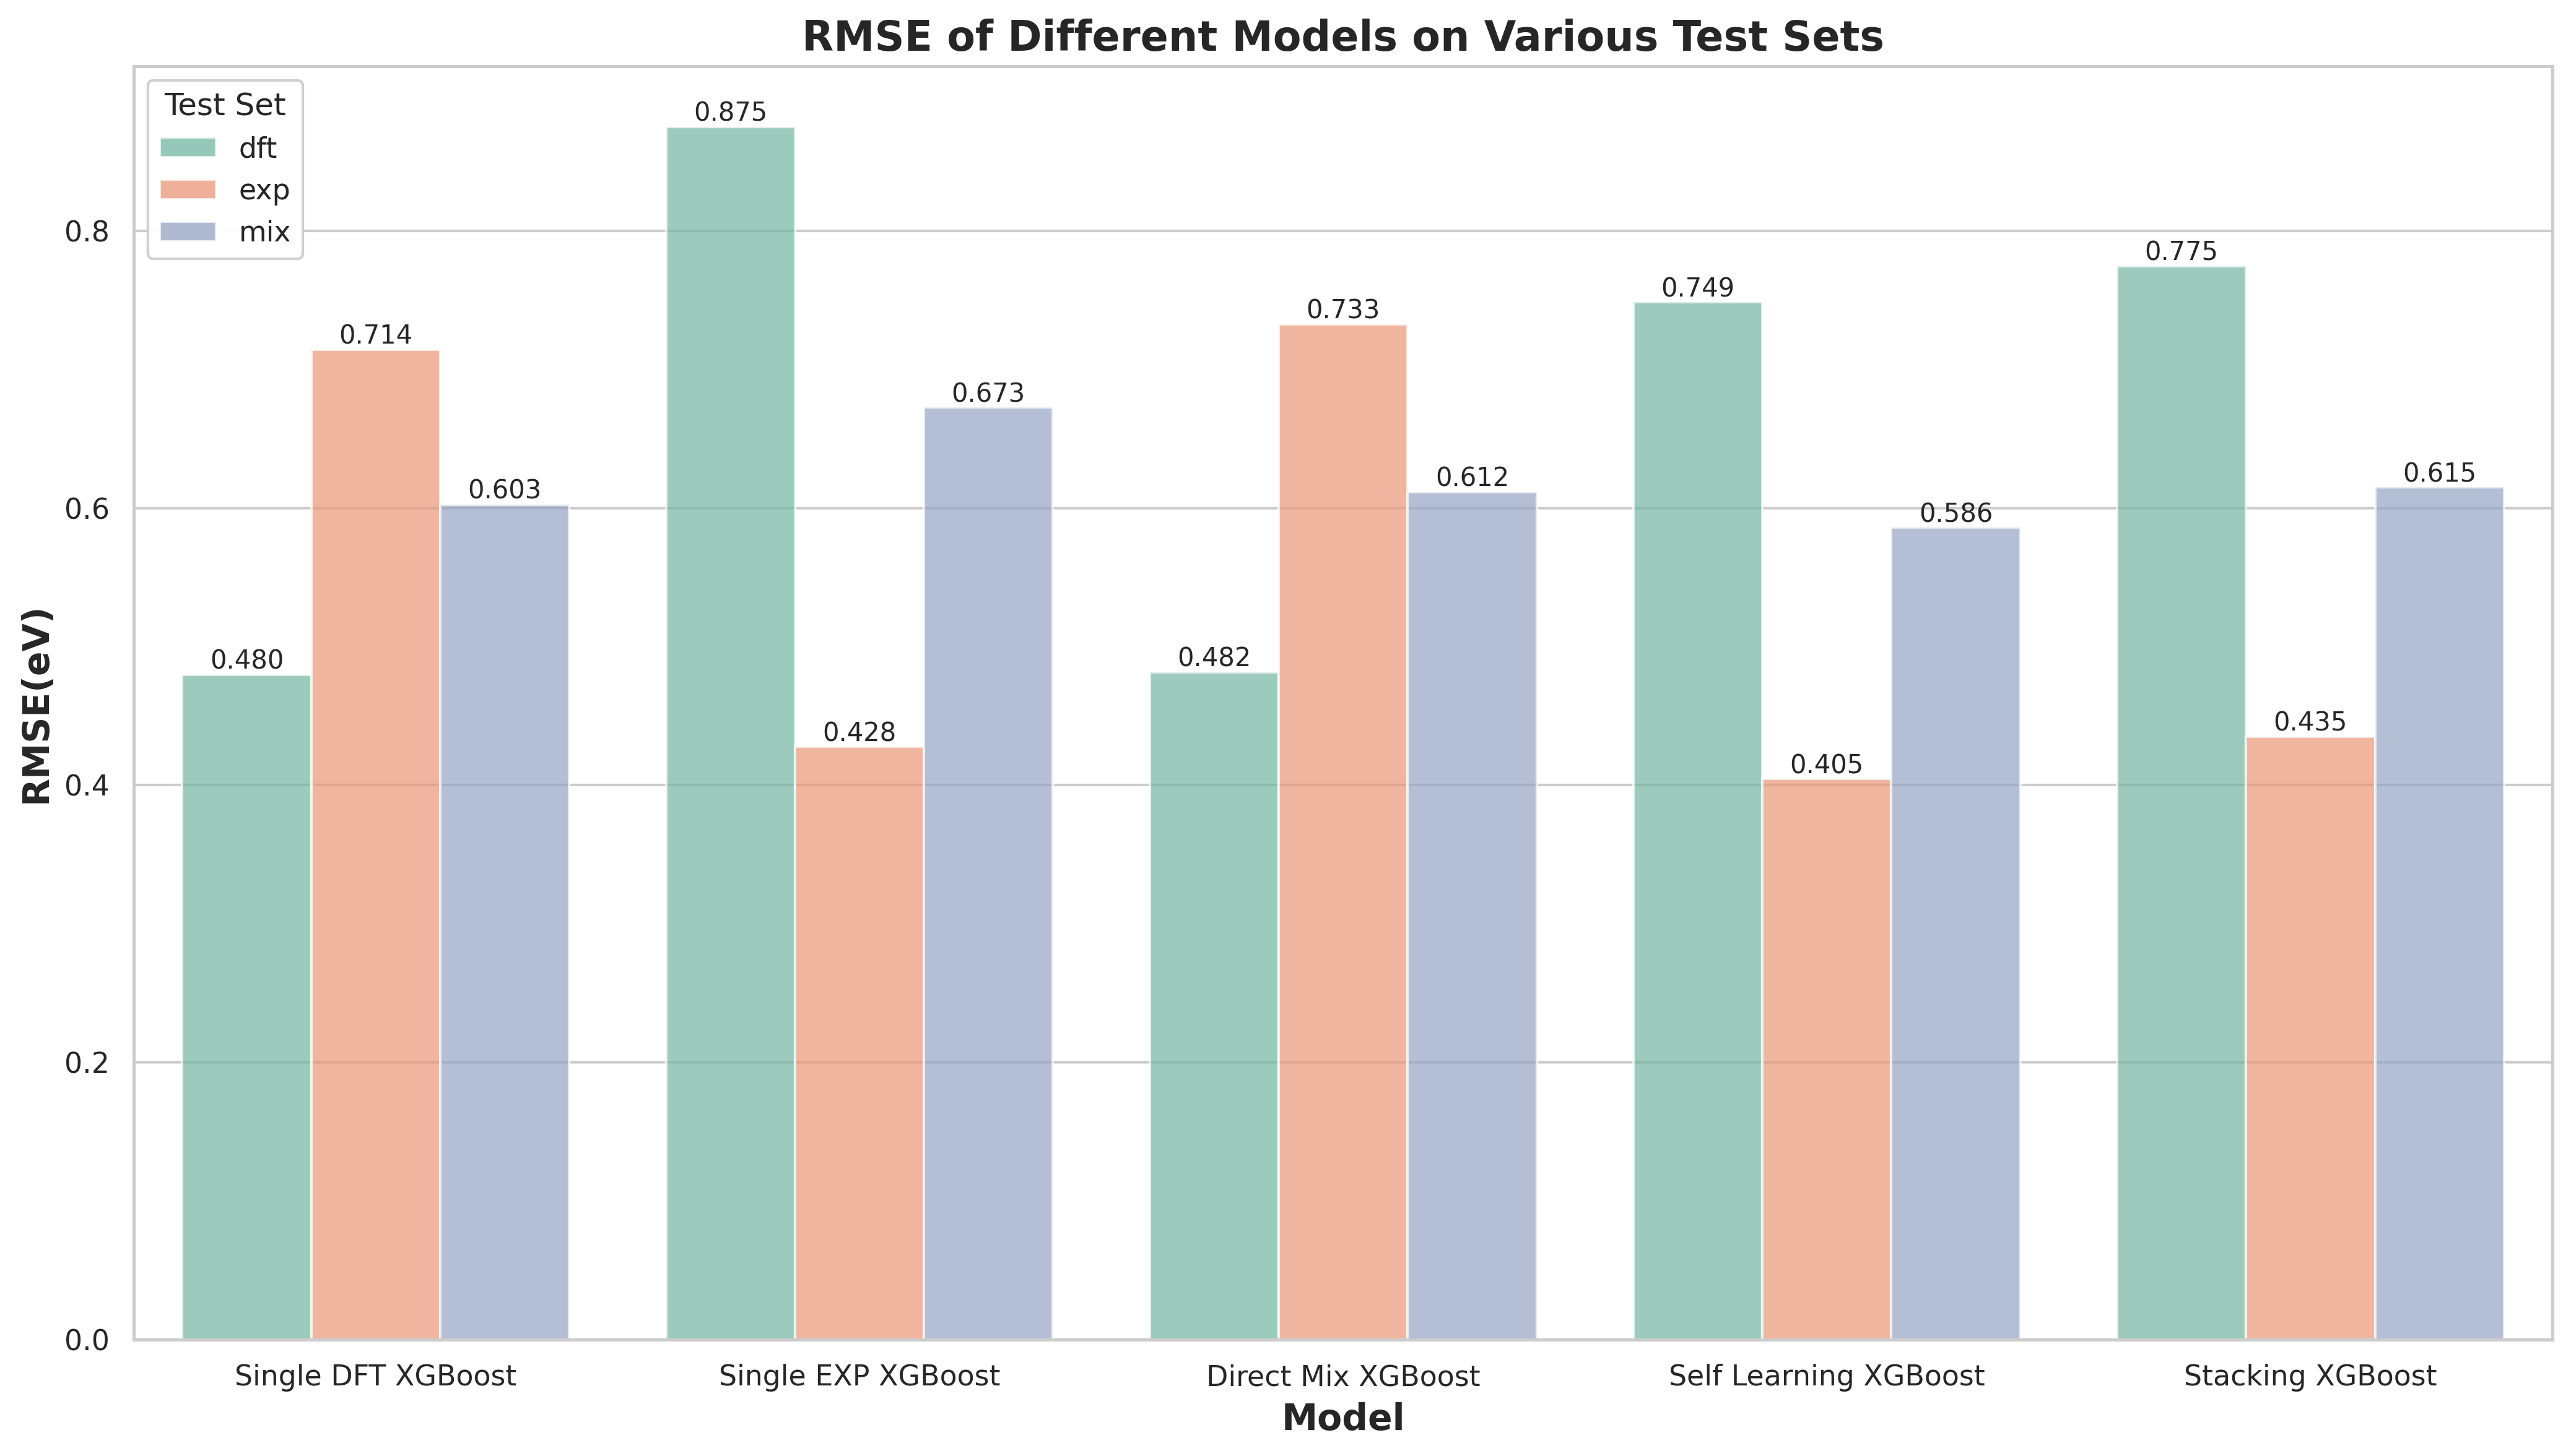

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. draw the rmse comparison figure

# set style
sns.set_theme(style="whitegrid")
plt.figure(figsize=(14, 8), dpi=300)

# get unique models
models = metrics['Model'].unique()
test_sets = metrics['Test_set'].unique()

# prepare data for plotting
plot_data = []
for model in models:
    model_metrics = metrics[metrics['Model'] == model]
    for _, row in model_metrics.iterrows():
        plot_data.append({
            'Model': row['Model'],
            'Train_set': row['Train_set'],
            'Test_set': row['Test_set'],
            'RMSE': row['RMSE']
        })

plot_df = pd.DataFrame(plot_data)


# create bar plot
ax = sns.barplot(
    x='Model', 
    y='RMSE', 
    hue='Test_set',
    data=plot_df,
    palette='Set2',
    alpha=0.7
)

# add data labels
# add data labels
for p in ax.patches:
    if p.get_height() > 0.01:
        ax.annotate(f'{p.get_height():.3f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height()), 
                    ha='center', va='bottom', fontsize=10)

# add legend
handles, labels = ax.get_legend_handles_labels()
test_set_legend = plt.legend(handles, labels, title='Test Set', loc='upper left')
ax.add_artist(test_set_legend)

# 
plt.xlabel('Model', fontsize=14, weight='bold')
plt.ylabel('RMSE(eV)', fontsize=14, weight='bold')
plt.title('RMSE of Different Models on Various Test Sets', fontsize=16, weight='bold')

plt.tight_layout()

# save the figure
fig_path = os.path.join(current_path, 'figures', 'metrics_comparison', 'mix_model')
os.makedirs(fig_path, exist_ok=True)
plt.savefig(os.path.join(fig_path, 'rmse_comparison_of_mix_model.png'), dpi=300, bbox_inches='tight')
plt.show()